<a href="https://colab.research.google.com/github/rypotter/rag_from_scratch/blob/main/RAG_Agents_w_LLaMA3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=bq1Plo2RhYI

https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_adaptive_rag_local/

### Reliable, fully local RAG agents with LLaMA3.2-3b

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain langchain_community tiktoken langchain-nomic "nomic[local]" langchain-ollama scikit-learn langgraph tavily-python bs4

We'll combine ideas from paper RAG papers into a RAG agent:

Routing: Adaptive RAG (paper). Route questions to different retrieval approaches
Fallback: Corrective RAG (paper). Fallback to web search if docs are not relevant to query
Self-correction: Self-RAG (paper). Fix answers w/ hallucinations or don’t address question

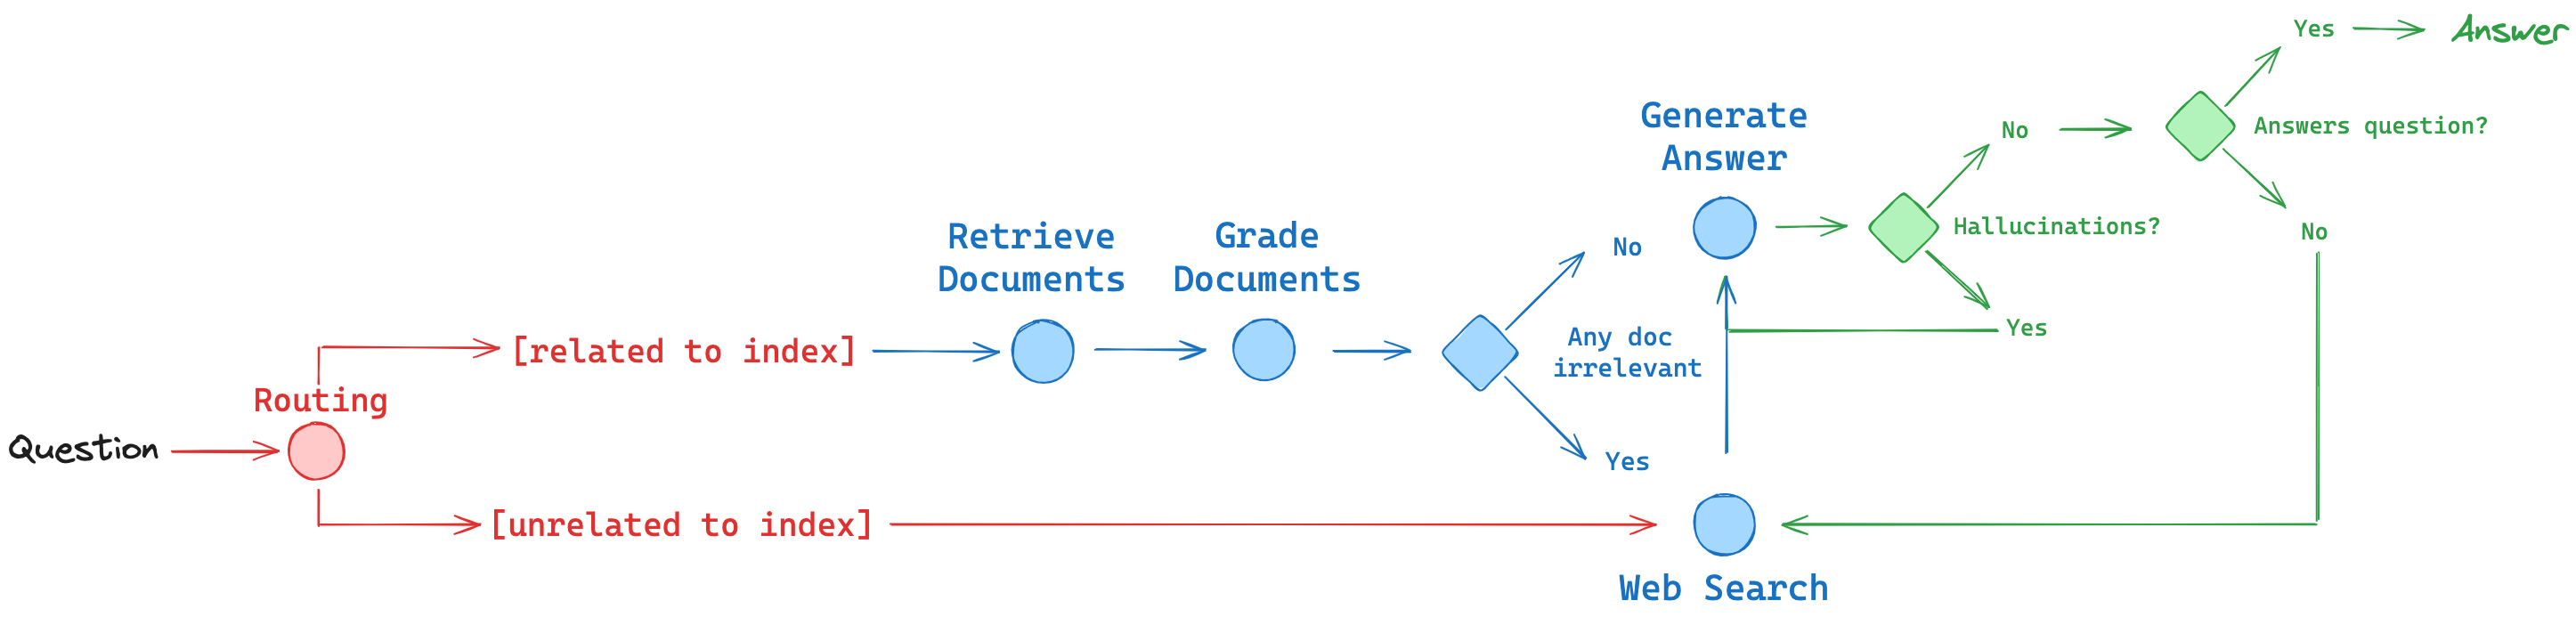

In [ ]:
!pip install langchain-nomic

In [5]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.5 MB/s eta 0:00:00


In [6]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!ollama pull llama3.2:3b-instruct-fp16

In [12]:
### LLM
from langchain_ollama import ChatOllama

local_llm = "llama3.2:3b-instruct-fp16"
llm = ChatOllama(model=local_llm, temperature=0)
llm_json_mode = ChatOllama(model=local_llm, temperature=0, format="json")

In [ ]:
#For search, we use Tavily, which is a search engine optimized for LLMs and RAG.
import os
import getpass


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
# Be lehetne állítani a Secret-ből is!!!

_set_env("TAVILY_API_KEY")
os.environ["TOKENIZERS_PARALLELISM"] = "true"